**Support Vector Machine (SVM) notebook practice at Cognitive Class ai (IBM)**

**SVM** is a supervised algorithm that works by mapping the data to a **high-dimensional** feature so that the data points can be categorized, even when the data are not linearly separable. 

A **Separator** between the categories is found, then the data is transformed in such a way that the separator could be drawn as a **hyperplane**.

SVM is good for Image Classification, Handwritten digit recognition, text-mining etc.

**Human cell dataset** (source IBM cognitive) is used for SVM algo analysis. 

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cell_samples.csv

**import library**

In [5]:
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cell_samples.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


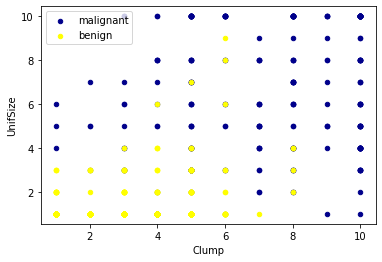

In [6]:
ax = df[df['Class'] == 4].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'DarkBlue', label = 'malignant')
df[df['Class'] == 2].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'Yellow', label = 'benign', ax=ax);
plt.show()

**Data pre-processing and selection**

In [8]:
df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [10]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

**Train/Test dataset**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (546, 9) (546,)
Test set:  (137, 9) (137,)


**Modeling (SVM with Scikit-learn)**

The SVM algorithm offers a choice of kernal functions for performing its processing. Mapping data into higher dimensional space is called **kernelling**. The mathematical function used for the transformation is known as the kernal function, and is of different types:

1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid



In [16]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
yhat = clf.predict(X_test)

In [18]:
yhat[0:5]

array([2, 4, 2, 4, 2])

In [19]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average = 'weighted')

0.9639038982104676

In [20]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9635036496350365